## What is the Correlation between the Columns is more happiness more dependent on some columns than others

#### Preparation and creating targets which are classifikation for bundles of countries

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import pycountry
import geopandas
import seaborn as sn
import matplotlib.pyplot as plt
#variable to chose a year
x="/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2019.csv"

#load the single data files of the different years and rename and drop certain columns such that all years are compareable
def read(x):
    df=pd.read_csv(x)
    if x=="/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2015.csv":
        df2=df.drop(columns=["Country","Region","Dystopia Residual","Happiness Rank", "Standard Error"])
        df3=df.drop(columns=["Country","Region","Dystopia Residual","Happiness Rank", "Standard Error"])
    elif x=="/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2016.csv":
        df2=df.drop(columns=["Country","Region","Dystopia Residual","Happiness Rank", "Lower Confidence Interval", "Upper Confidence Interval"])
        df3=df.drop(columns=["Country","Region","Dystopia Residual","Happiness Rank", "Lower Confidence Interval", "Upper Confidence Interval"])
    elif x=="/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2017.csv":
        df=df.rename(columns={"Economy..GDP.per.Capita.":"Economy (GDP per Capita)","Health..Life.Expectancy.":"Health (Life Expectancy)","Trust..Government.Corruption.":"Trust (Government Corruption)","Happiness.Rank":"Happiness Rank","Happiness.Score":"Happiness Score"})
        df.insert(9,'Trust (Government Corruption)',df.pop("Trust (Government Corruption)"))
        df2=df.drop(columns=["Country","Dystopia.Residual","Happiness Rank", "Whisker.high", "Whisker.low"])
        df3=df.drop(columns=["Country","Dystopia.Residual","Happiness Rank", "Whisker.high", "Whisker.low"])
    elif x=="/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2018.csv" or x=="/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2019.csv":
        df=df.rename(columns={"Overall rank":"Happiness Rank","Score":"Happiness Score","Country or region":"Country","Healthy life expectancy":"Health (Life Expectancy)","Social support":"Family","Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)","GDP per capita":"Economy (GDP per Capita)",})
        df.insert(7,'Trust (Government Corruption)',df.pop("Trust (Government Corruption)"))
        df2=df.drop(columns=["Country","Happiness Rank"])
        df3=df.drop(columns=["Country","Happiness Rank"])
    #introducing a new column to split the data in 5 regions depending on their rank
    x=[]
    for i in df["Happiness Rank"]:
        if i<30:
            x.append(0)
        elif 30<i<60:
            x.append(1)
        elif 60<i<90:
            x.append(2)
        elif 90<i<120:
            x.append(3)
        else:
            x.append(4)
    df2.loc[:,"target"] =x
    return df2,df3



#### creating a heatmap for each target, the dependency for each columns 

Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')


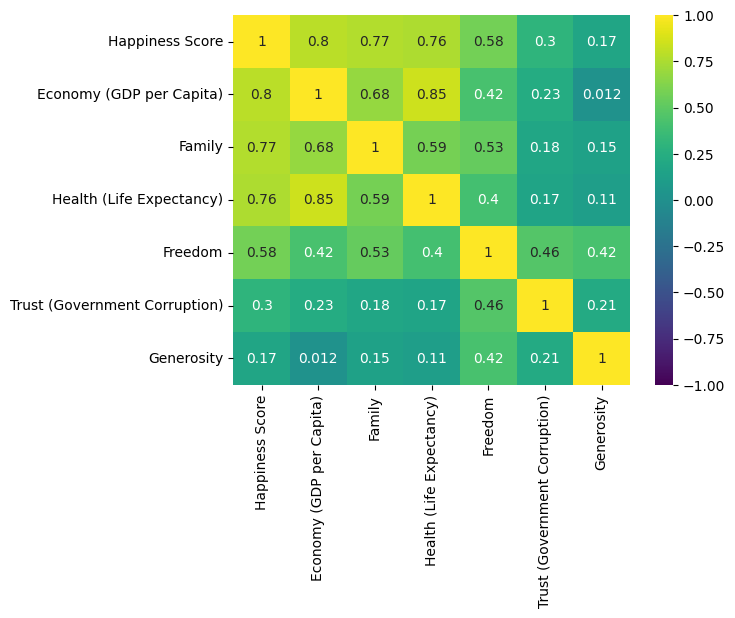

/var/folders/3f/n2rwh49d413bhwkgtvznx7qc0000gn/T/ipykernel_3279/3327602434.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  u.append(correlation.loc["Happiness Score"][4])


Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')


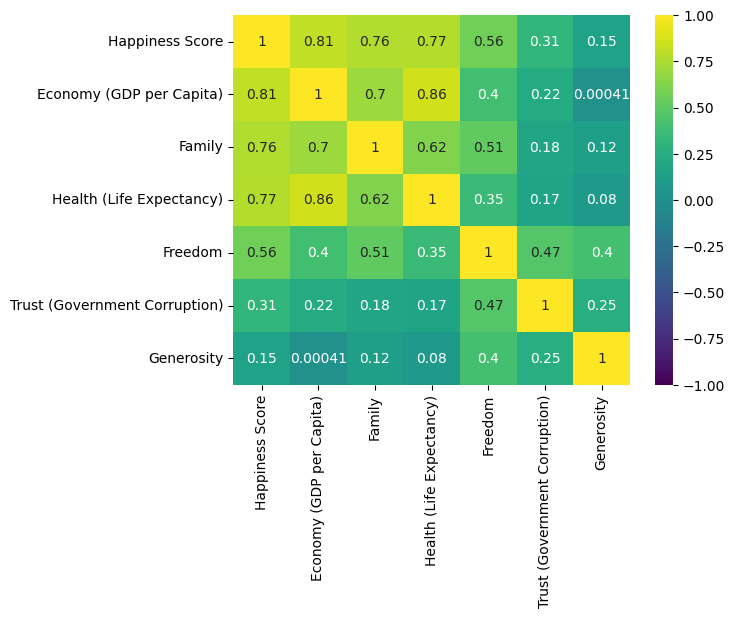

/var/folders/3f/n2rwh49d413bhwkgtvznx7qc0000gn/T/ipykernel_3279/3327602434.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  u.append(correlation.loc["Happiness Score"][4])


Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')


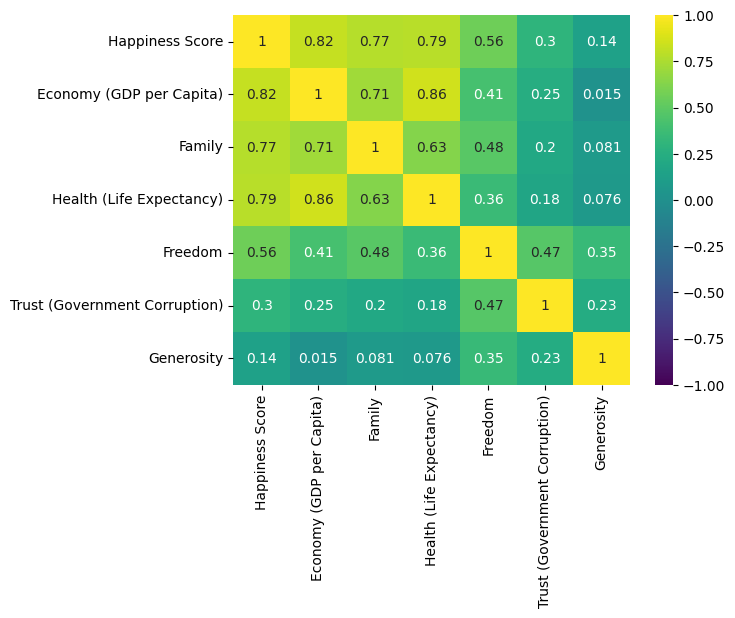

/var/folders/3f/n2rwh49d413bhwkgtvznx7qc0000gn/T/ipykernel_3279/3327602434.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  u.append(correlation.loc["Happiness Score"][4])


Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')


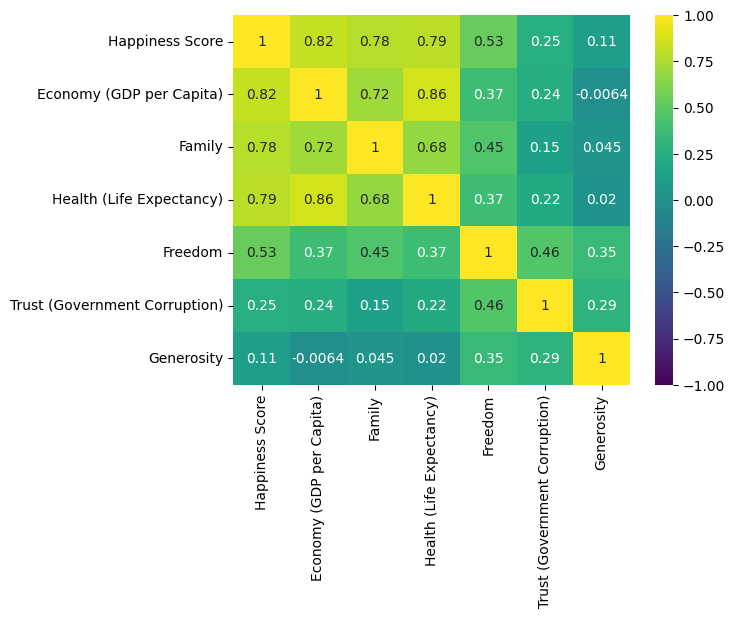

/var/folders/3f/n2rwh49d413bhwkgtvznx7qc0000gn/T/ipykernel_3279/3327602434.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  u.append(correlation.loc["Happiness Score"][4])


Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')


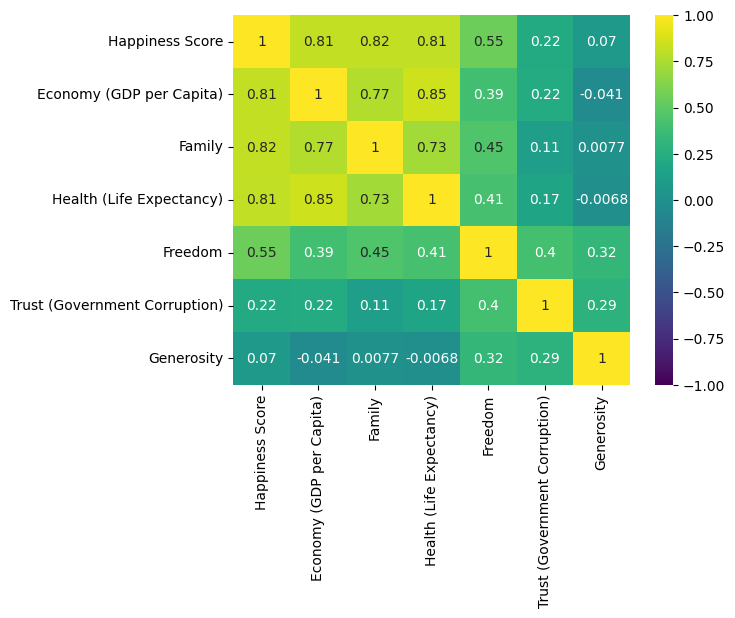

/var/folders/3f/n2rwh49d413bhwkgtvznx7qc0000gn/T/ipykernel_3279/3327602434.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  u.append(correlation.loc["Happiness Score"][4])


In [13]:


#producing heatmaps with a correlation
# u is a list to compare the different correlations of each year with each other
u=[]
for i in range(5):
    correlation=read("/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/201"+str(5+i)+".csv")[1].corr(method='spearman')
    print(correlation.columns)
    sn.heatmap(correlation,vmin=-1, vmax=1, center=0, cmap="viridis", annot=True)
    plt.savefig("heatmap_"+str(i)+".png",bbox_inches="tight",dpi=1200)
    plt.show()
    u.append(correlation.loc["Happiness Score"][4])
    


#### Plotting the standard deviation of the correlation and the Pairplot which shows the correlation each column with other column



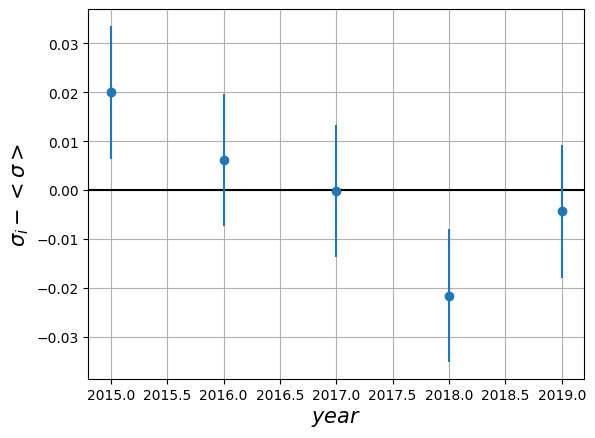

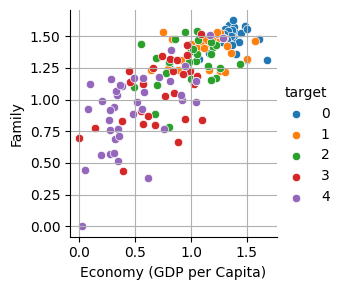

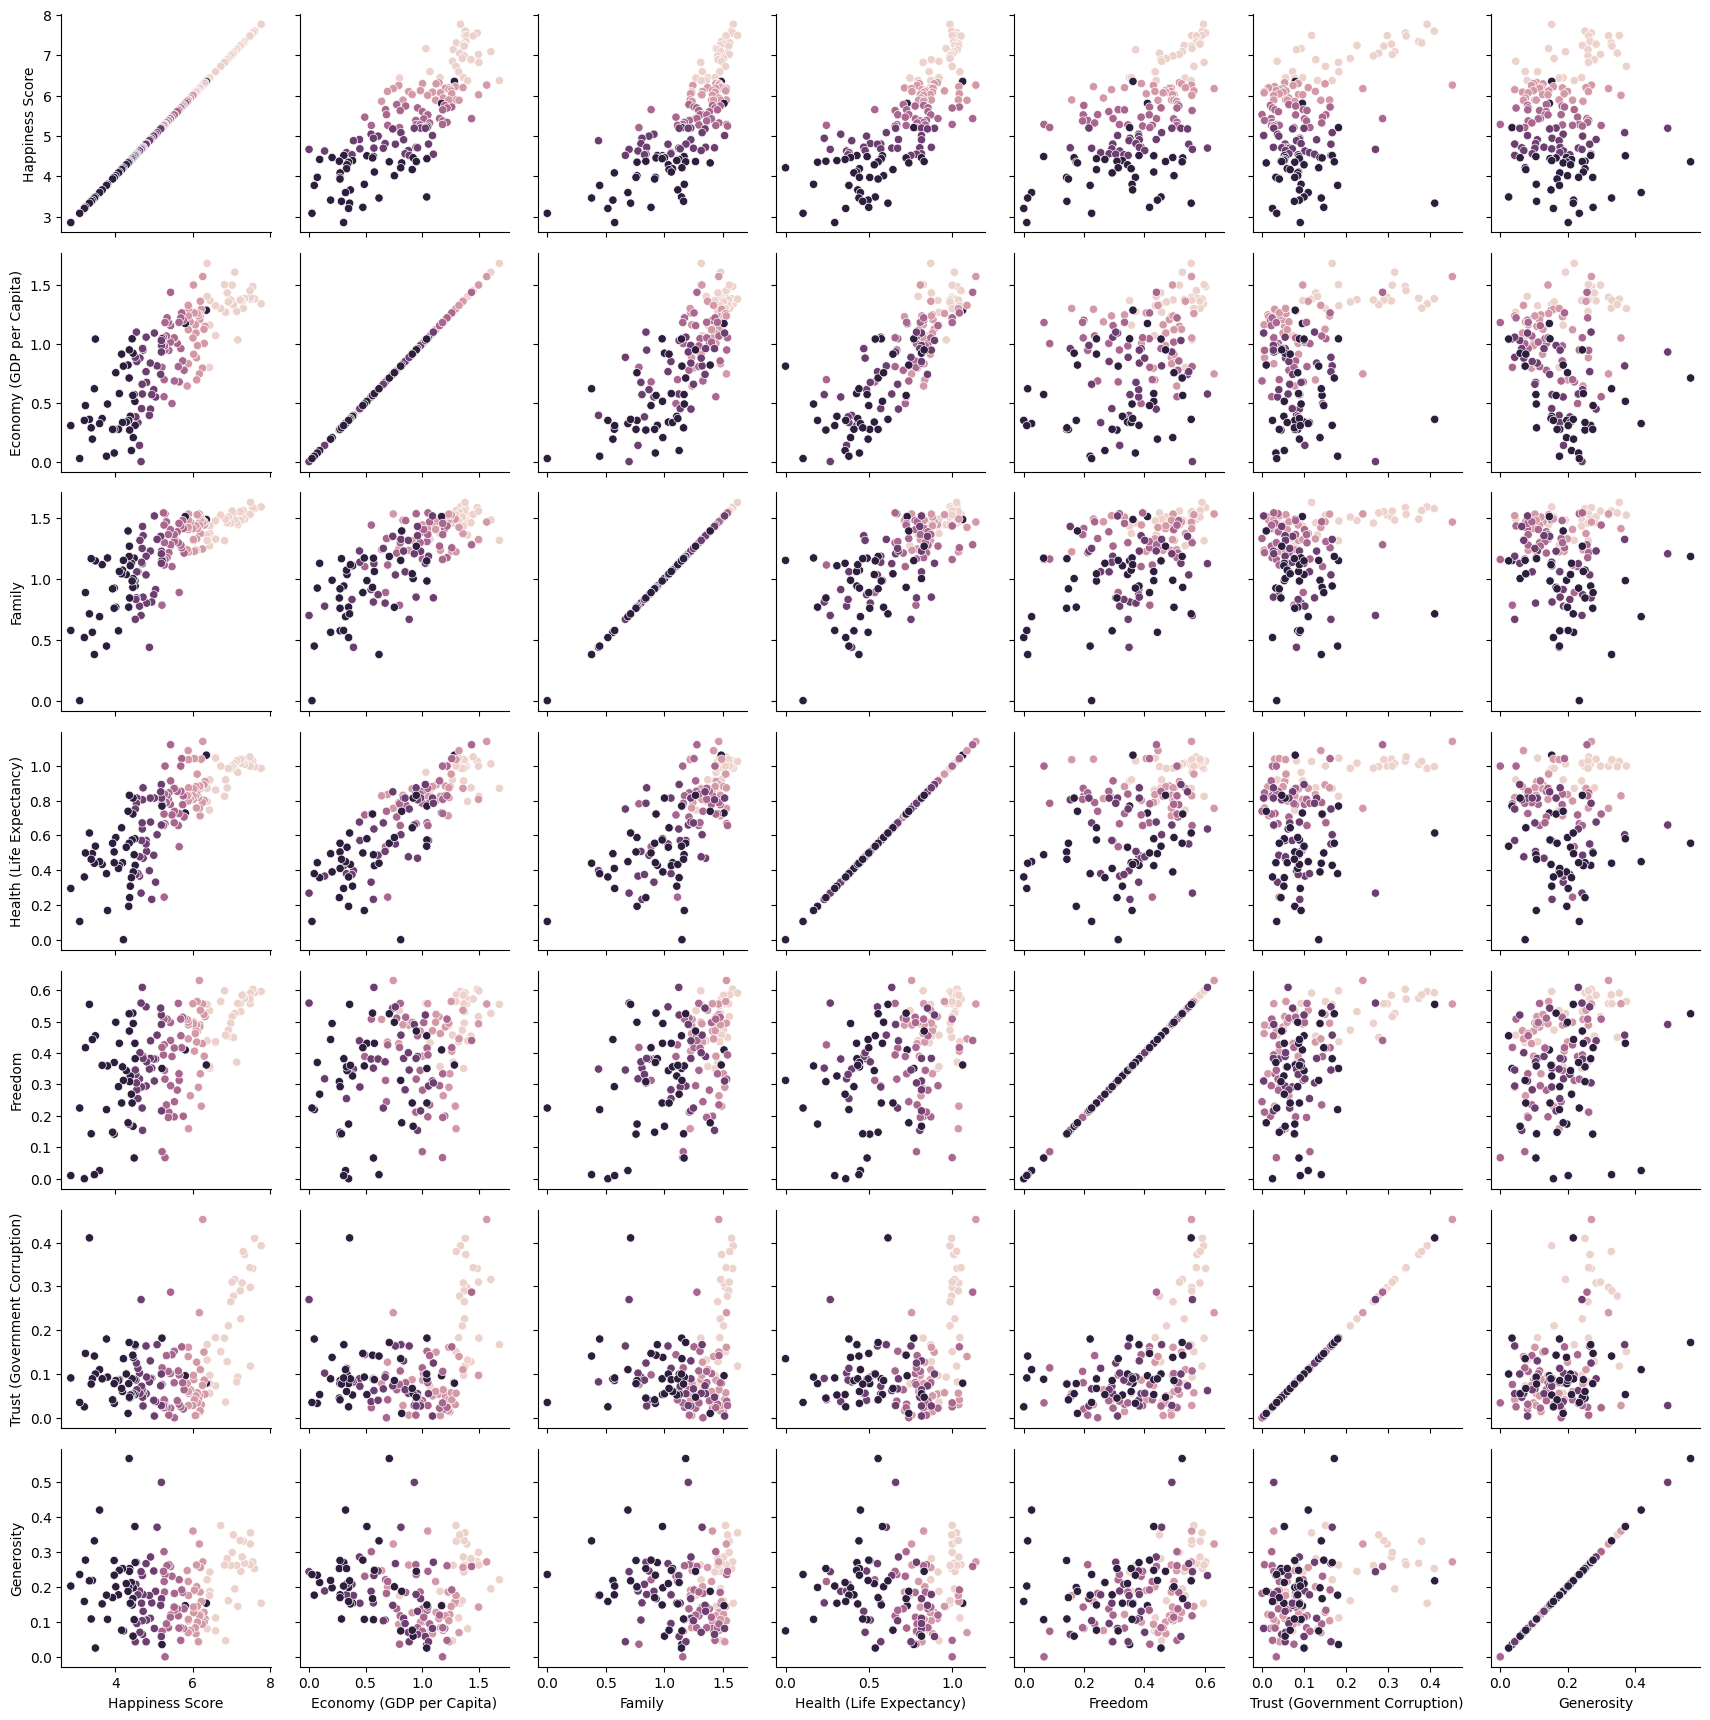

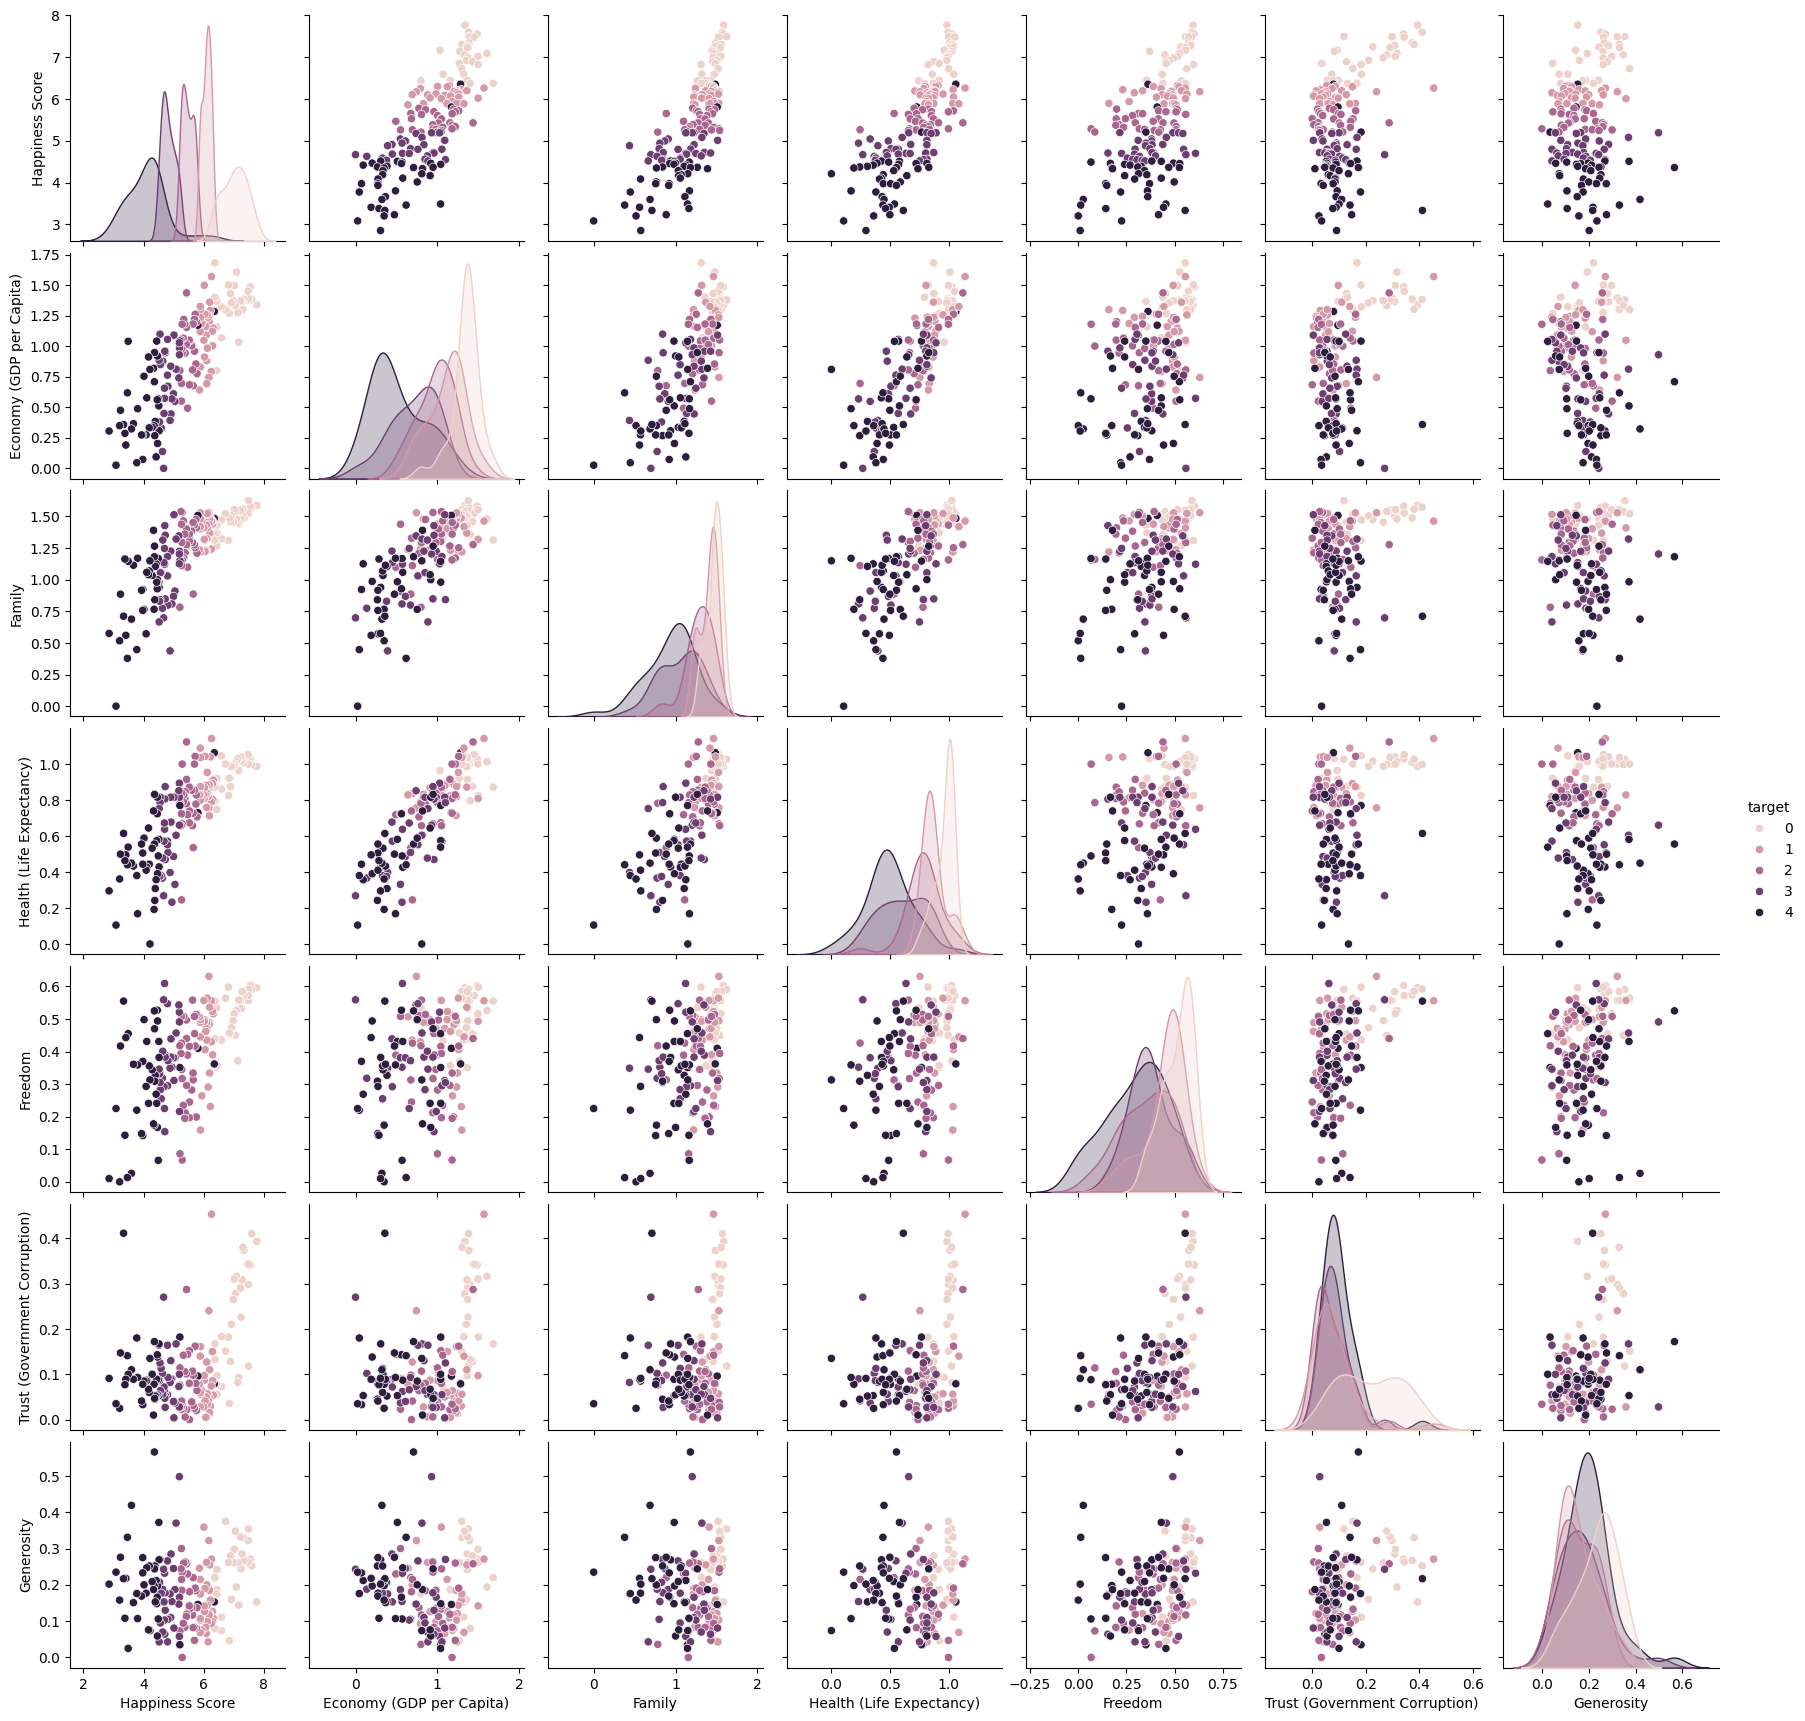

In [10]:

u_mean=np.mean(u)
u_std=np.std(u)
u_ris=[]
index=np.linspace(2015,2019,5)
for i in range(len(u)):
    u_ris.append(u[i]-u_mean)
plt.axhline(0,color="black")
plt.errorbar(index,u_ris,yerr=u_std,fmt="o")
plt.grid(True)
plt.ylabel("$\\sigma_{i}-<\\sigma>$",{"color":"black","fontsize":15})
plt.xlabel("$year$",{"color":"black","fontsize":15})
#plt.savefig("Residual_Happiness_score_vs_Freedom.png",bbox_inches="tight",dpi=1200)

#producing scatterplot of one column with another

g=sn.FacetGrid(read(x)[0],hue="target")
g.map(sn.scatterplot, "Economy (GDP per Capita)","Family")
g.add_legend()
plt.grid(True)
#plt.savefig("Single_scatter_Economy_vs_Family_"+x+".png",bbox_inches="tight",dpi=1200)

#producing scatterplot of all columns with each other

g=sn.PairGrid(read(x)[0],hue="target")
g.map(sn.scatterplot)
#plt.savefig("All_scatter_"+x+".png",bbox_inches="tight",dpi=1200)
plt.show()

#producing scatterplot of all columns with each other but the diagonal ones are plotted with a distribution
sn.pairplot(read(x)[0],hue="target")
#plt.savefig("All_scatter_plot_distribution_"+x+".png",bbox_inches="tight",dpi=1200)

#### Conclusion: if we analyse the graph more accurate we can identify that the Economy makes the biggest impact on the happiness score. This makes sense when we look at the happiest countries then we see that there the countries which has a good and stable Economy.